<a href="https://colab.research.google.com/github/agsosin/COLAB/blob/main/CNN_11820_Sosin_Agnieszka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <font size="5"> Zaawansowane Metody Sztucznej Inteligencji<br/>
        <small><em>Studia stacjonarne II stopnia 2024/2025</em><br/>Kierunek: Informatyka</small>
    </font>
</center>
<br>



# Laboratorium nr 4: Konwolucyjne sieci neuronowe: Klasyfikacji obrazów

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

## Import bibliotek

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print('Numpy version:', np.__version__)
print('Tensorflow version:', tf.__version__)

Numpy version: 1.26.4
Tensorflow version: 2.17.1


## Baza MNIST

- Baza MNIST zawiera zbiór trenujący składający się z 60,000 przykładów skanów ręcznie pisanych cyfr od 0 do 9 (problem klasyfikacyjny z 10 klasami).
- Zbiór testowy zawiera 10,000 przykładów.
- Każdy obraz ma rozmiar 28x28 pikseli. Stanowią one 28 * 28 = 784 wejść do sieci.
- W zagadnieniach rozpoznawania obrazów baza MNIST pełni rolę swoistego problemu `Hello world`.

#### Pobieranie bazy MNIST
- Bazę MNIST można pobrać bespośrednio ze strony http://yann.lecun.com/exdb/mnist/
- Najwygodniej jednak jest użyć bazy MNIST z wykorzystaniem biblioteki Keras

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
train_images = np.expand_dims(train_images, axis=-1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis=-1)/255.
test_labels = np.int64(test_labels)
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


Przykładowe cyfry:

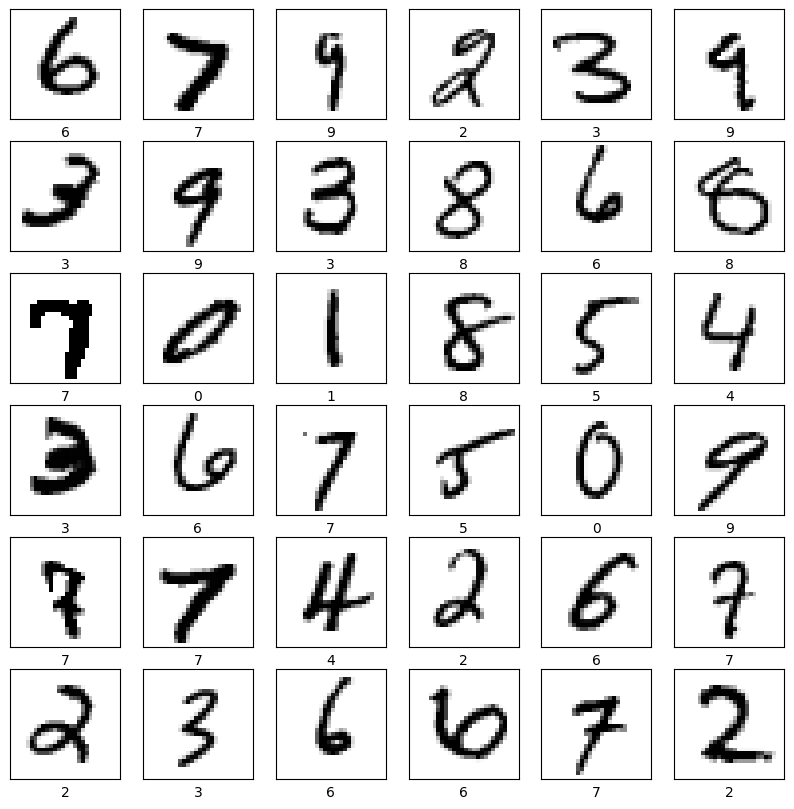

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000, 36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## Sieć wielowarstwowa

### Tworzenie modelu

#### Ćwiczenie 1:
Sieć pełnych połączeń
- Stwórz w bibliotece keras model klasycznej sieci wielowarstwowej z dwiema warstwami ukrytymi.
- Dla pierwszej warstwy ustaw liczbę 128 neuronów
- Dla drugie warstwy liczbę neuronów odpowiedającą liczbie klas.
- Dobierz odpowiednie funkcje aktywacji.

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Flatten

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8750 - loss: 0.4491 - val_accuracy: 0.9627 - val_loss: 0.1322
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9605 - loss: 0.1349 - val_accuracy: 0.9698 - val_loss: 0.0977
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0830 - val_accuracy: 0.9753 - val_loss: 0.0872
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9820 - loss: 0.0602 - val_accuracy: 0.9782 - val_loss: 0.0783
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0464 - val_accuracy: 0.9785 - val_loss: 0.0762
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9900 - loss: 0.0339 - val_accuracy: 0.9795 - val_loss: 0.0774
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9920 - loss: 0.0271 - val_accuracy: 0.9798 - val_loss: 0.0737
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9938 - loss: 0.0222 - 

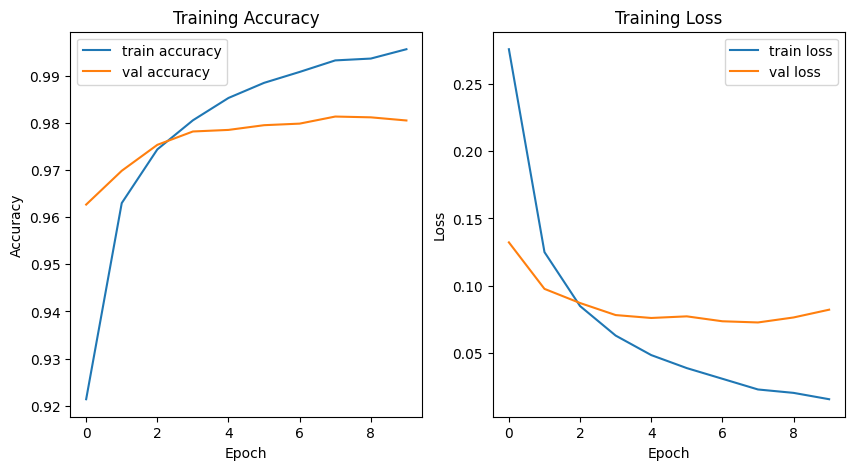

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


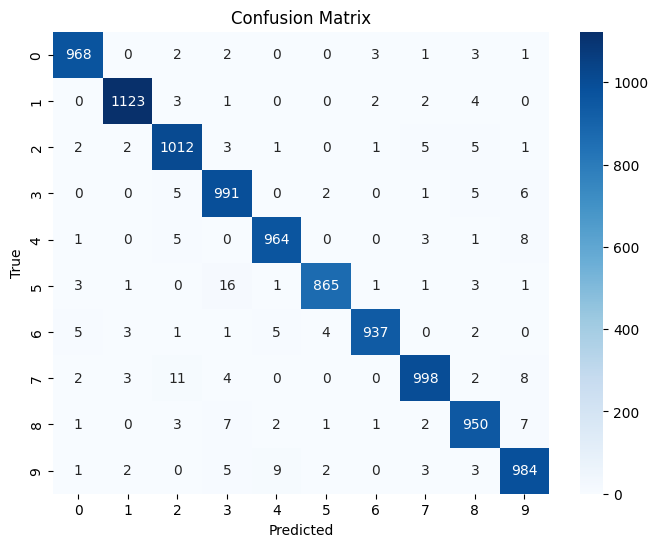

Test Loss: 0.07848348468542099
Test Accuracy: 0.979200005531311


In [ ]:
# prompt: Stwórz w bibliotece keras model klasycznej sieci wielowarstwowej (MLP)  z dwiema warstwami ukrytymi.
# Dla pierwszej warstwy ustaw liczbę 128 neuronów
# Dla drugie warstwy liczbę neuronów odpowiedającą liczbie klas.
# Dobierz odpowiednie funkcje aktywacji.
# Zwizualizuj wyniki i zrób testy. Dodaj: krzywa uczenia, confusion matrix, wyniki

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the model
def create_mlp_model(num_classes):
    model = tf.keras.models.Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Assuming num_classes is 10 for MNIST
num_classes = 10
model = create_mlp_model(num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.show()

# Confusion matrix
predictions = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

### Kompilacja

#### Ćwiczenie 2:
Skompiluj model ustawiając:
- funkcje straty: `sparse_categorical_crossentropy`
- algorytm optymalizacji: np. `SGD`
- metryki monitorujące proces uczenia: `accuracy`

In [ ]:
# prompt: Skompiluj model ustawiając:
# funkcje straty: sparse_categorical_crossentropy
# algorytm optymalizacji: np. SGD
# metryki monitorujące proces uczenia: accuracy

# Assuming num_classes is 10 for MNIST
num_classes = 10
model = create_mlp_model(num_classes)

# Compile the model using SGD optimizer
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#TODO:

### Trenowanie
Trenowanie z wykorzystaniem podziału na dane uczące i walidacyjne, oraz `ModelCheckpoint`, czylu zapisywanie najlepszego modelu

In [ ]:
# prompt: Trenowanie z wykorzystaniem podziału na dane uczące i walidacyjne, oraz ModelCheckpoint, czylu zapisywanie najlepszego modelu

import os

# Define the model checkpoint callback
checkpoint_filepath = 'best_model.keras'  # Changed from .h5 to .keras
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Save the entire model
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',  # Save the model with the highest validation accuracy
    save_best_only=True) # Only save the best model

# Train the model with validation split and ModelCheckpoint
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1,
                    callbacks=[model_checkpoint_callback])


# Load the best model
best_model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate the best model
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print('Best Model Test accuracy:', test_acc)

# (Optional) Remove the saved model file if needed
#os.remove(checkpoint_filepath)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9812 - val_loss: 0.0826
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9973 - loss: 0.0094 - val_accuracy: 0.9788 - val_loss: 0.0881
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9974 - loss: 0.0097 - val_accuracy: 0.9772 - val_loss: 0.1015
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9974 - loss: 0.0081 - val_accuracy: 0.9788 - val_loss: 0.1011
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9978 - loss: 0.0073 - val_accuracy: 0.9783 - val_loss: 0.1033
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9983 - loss: 0.0062 - val_accuracy: 0.9797 - val_loss: 0.1045
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9984 - loss: 0.0055 - val_accuracy: 0.9790 - val_loss: 0.1048
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9981 - loss: 0.0057 - 

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# aby zapisać model na Google Drive podaj odpowiednią ścieżkę
cb = [ModelCheckpoint('model_fc_mnist.keras', monitor='val_accuracy', save_best_only=True)]

NameError: name 'ModelCheckpoint' is not defined

In [ ]:
BATCH_SIZE = 64
EPOCHS = 20

In [ ]:
# moja ścieżka
from tensorflow.keras.callbacks import ModelCheckpoint # Import ModelCheckpoint in this cell
cb = [ModelCheckpoint('model_fc_mnist.keras', monitor='val_accuracy', save_best_only=True)]

In [ ]:
#TODO:

### Ewaluacja zbioru testowego

In [ ]:
#TODO:

In [ ]:
# prompt: teraz muszę zewaluować zbiór testowy

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print('Best Model Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9773 - loss: 0.0932
Best Model Test accuracy: 0.980400025844574


Model z pliku

In [ ]:
fmodel = tf.keras.models.load_model('model_fc_mnist.keras')
fmodel.evaluate(test_images, test_labels)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
predictions = fmodel.predict(test_images)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Najlepsze wyniki dla bazy MNIST
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354

## Sieć konwolucyjna

### Prosty model

#### Ćwiczenie 3:

- Stwórz w bibliotece keras model prostej sieci konwolucyjnej z 1 warstwą conwolucyjną, 1 warstwą MaxPooling i warstwami klasyfikacyjnymi jak w poprzednim modelu.

In [ ]:
# prompt: Stwórz w bibliotece keras model prostej sieci konwolucyjnej z 1 warstwą conwolucyjną, 1 warstwą MaxPooling i warstwami klasyfikacyjnymi jak w poprzednim modelu

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D

def create_cnn_model(num_classes):
    model = tf.keras.models.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Assuming num_classes is 10 for MNIST
num_classes = 10
cnn_model = create_cnn_model(num_classes)

cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9080 - loss: 0.3121 - val_accuracy: 0.9823 - val_loss: 0.0614
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9837 - loss: 0.0531 - val_accuracy: 0.9865 - val_loss: 0.0489
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 0.9870 - val_loss: 0.0487
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9927 - loss: 0.0220 - val_accuracy: 0.9880 - val_loss: 0.0520
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9957 - loss: 0.0134 - val_accuracy: 0.9875 - val_loss: 0.0507
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9965 - loss: 0.0104 - val_accuracy: 0.9865 - val_loss: 0.0611
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9976 - loss: 0.0076 - val_accuracy: 0.9860 - val_loss: 0.0618
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9985 - loss: 0.0052 - 

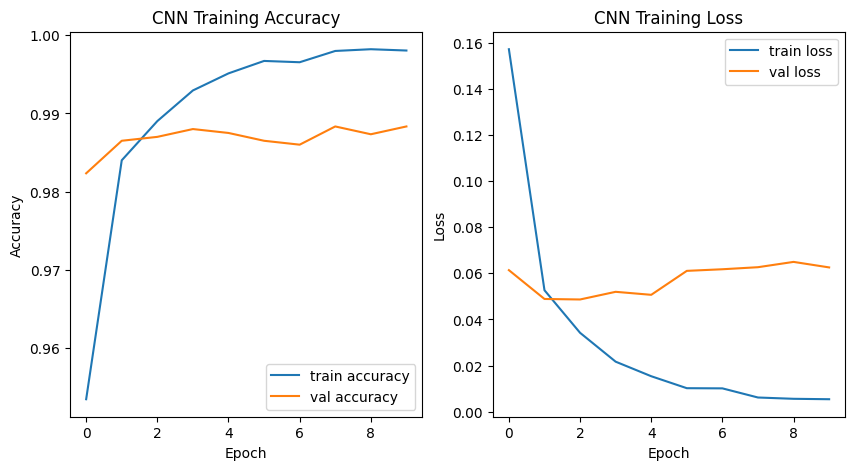

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


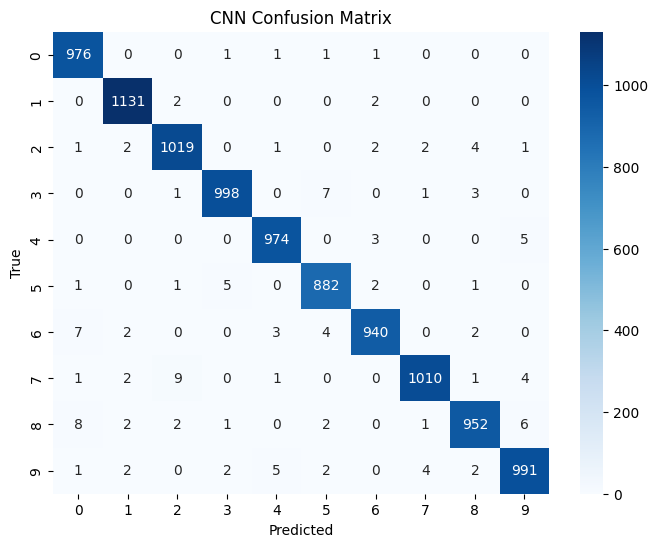

CNN Test Loss: 0.05486419051885605
CNN Test Accuracy: 0.9872999787330627
Epochs: 10
Iterations per epoch (assuming batch size 32): 1875
Total Iterations: 18750


In [ ]:
# prompt: teraz mi wytrenuj ten model i dodaj informacje o : krzywa uczenia, confusion matrix, wyniki, epoki, iteracje, macierz

# Training the CNN model
history_cnn = cnn_model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate the CNN model
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(test_images, test_labels)
print('CNN Test accuracy:', test_acc_cnn)

# Plot training history for CNN
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='train accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='train loss')
plt.plot(history_cnn.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Training Loss')

plt.show()

# Confusion matrix for CNN
predictions_cnn = np.argmax(cnn_model.predict(test_images), axis=1)
cm_cnn = confusion_matrix(test_labels, predictions_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()

print("CNN Test Loss:", test_loss_cnn)
print("CNN Test Accuracy:", test_acc_cnn)

# Displaying epochs, iterations and other information
print("Epochs:", len(history_cnn.history['loss']))
print("Iterations per epoch (assuming batch size 32):", len(train_images) // 32) #Approximation
print("Total Iterations:", len(history_cnn.history['loss']) * (len(train_images) // 32))

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout

In [ ]:
def conv_model():
    x = Input(shape=(28,28,1))
    #TODO:

model = conv_model()
model.summary()

### Kompilacja i trenowanie

#### Ćwiczenie 4:
- Skompiluj i wytrenuj model ustawiając parametry jak przy sieci wielowarstwowej.

In [ ]:
#TODO:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8553 - loss: 0.4586 - val_accuracy: 0.9840 - val_loss: 0.0535
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9749 - loss: 0.0844 - val_accuracy: 0.9885 - val_loss: 0.0384
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9814 - loss: 0.0611 - val_accuracy: 0.9910 - val_loss: 0.0311
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9867 - loss: 0.0452 - val_accuracy: 0.9913 - val_loss: 0.0349
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9870 - loss: 0.0402 - val_accuracy: 0.9908 - val_loss: 0.0315
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9900 - loss: 0.0332 - val_accuracy: 0.9908 - val_loss: 0.0305
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9911 - loss: 0.0291 - val_accuracy: 0.9905 - val_loss: 0.0346
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0259 -

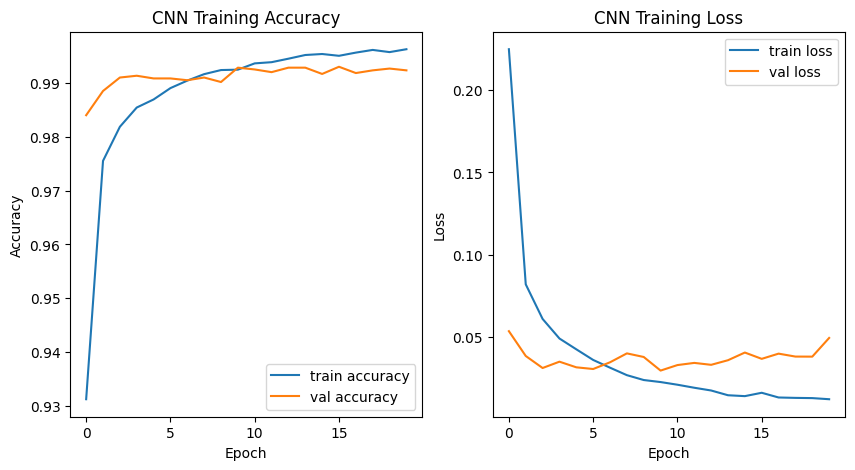

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


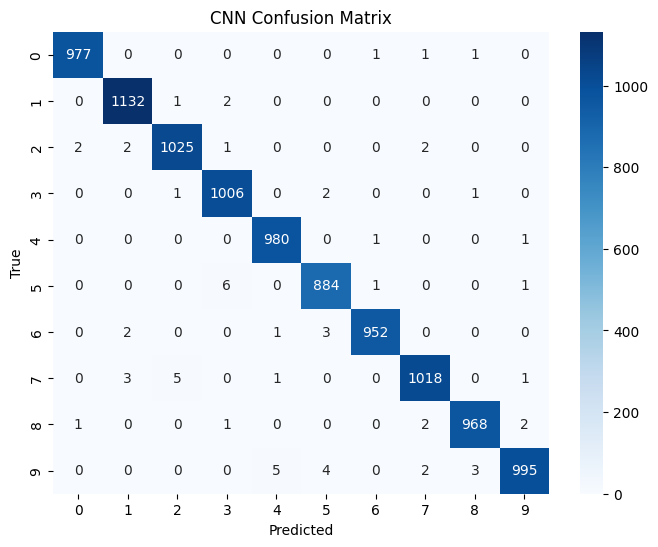

CNN Test Loss: 0.024650460109114647
CNN Test Accuracy: 0.9937000274658203


In [ ]:
# prompt: Skompiluj i wytrenuj model ustawiając parametry dla wielu warstw. Podaj krzywa uczenia, confusion matrix, wyniki

def create_cnn_model(num_classes):
    model = tf.keras.models.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),  # Added another convolutional layer
        MaxPooling2D((2, 2)),  # Added another max-pooling layer
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5), #Added dropout for regularization
        Dense(num_classes, activation='softmax')
    ])
    return model

# Assuming num_classes is 10 for MNIST
num_classes = 10
cnn_model = create_cnn_model(num_classes)

cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

# Training the CNN model with increased epochs and callbacks
checkpoint_filepath = 'best_cnn_model.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history_cnn = cnn_model.fit(train_images, train_labels, epochs=20, validation_split=0.1, callbacks=[model_checkpoint_callback])

# Load the best model
best_cnn_model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate the best model
test_loss_cnn, test_acc_cnn = best_cnn_model.evaluate(test_images, test_labels)
print('CNN Test accuracy:', test_acc_cnn)

# Plot training history for CNN
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='train accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='train loss')
plt.plot(history_cnn.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Training Loss')

plt.show()

# Confusion matrix for CNN
predictions_cnn = np.argmax(best_cnn_model.predict(test_images), axis=1)
cm_cnn = confusion_matrix(test_labels, predictions_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()

print("CNN Test Loss:", test_loss_cnn)
print("CNN Test Accuracy:", test_acc_cnn)

In [ ]:
cb = [ModelCheckpoint('model_conv_mnist.keras', monitor='val_accuracy', save_best_only=True)]

In [ ]:
#TODO FIT:

### Ewaluacja zbioru testowego

In [ ]:
#TODO:

In [ ]:
# prompt: teraz ewaluacja zbioru testowego

# Evaluate the best model on the test set
test_loss, test_acc = best_cnn_model.evaluate(test_images, test_labels)
print('Best CNN Model Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9914 - loss: 0.0298
Best CNN Model Test accuracy: 0.9937000274658203


Model z pliku

In [ ]:
fmodel = tf.keras.models.load_model('model_conv_mnist.keras')
fmodel.evaluate(test_images, test_labels)

## Ćwiczenie 5:
Zdefiniuj, wytrenuj i przetestuj model sieci konwolucyjnej jak na rysunku:
![convnet](http://torus.uck.pk.edu.pl/~amarsz/images/zmum/cw5.PNG)

In [ ]:

def conv_model():
    x = Input(shape=(28,28,1))
    #TODO:
model = conv_model()
model.summary()

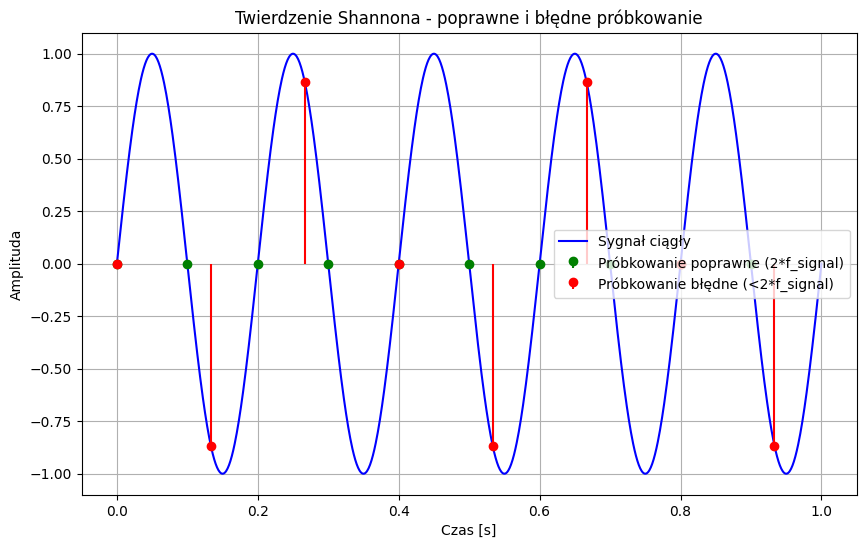

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sygnał ciągły: sinusoidalny
f_signal = 5  # [Hz] - częstotliwość sygnału
t_continuous = np.linspace(0, 1, 1000)  # Czas ciągły
signal_continuous = np.sin(2 * np.pi * f_signal * t_continuous)

# Próbkowanie zgodne z Shannona (częstotliwość Nyquista)
f_sample_good = 2 * f_signal  # Zgodne z twierdzeniem
t_sample_good = np.arange(0, 1, 1/f_sample_good)
signal_sample_good = np.sin(2 * np.pi * f_signal * t_sample_good)

# Próbkowanie poniżej częstotliwości Nyquista (aliasing)
f_sample_bad = 1.5 * f_signal  # Za mała częstotliwość
t_sample_bad = np.arange(0, 1, 1/f_sample_bad)
signal_sample_bad = np.sin(2 * np.pi * f_signal * t_sample_bad)

# Wykresy
plt.figure(figsize=(10, 6))

# Sygnał ciągły
plt.plot(t_continuous, signal_continuous, label="Sygnał ciągły", color='blue')

# Próbkowanie poprawne
plt.stem(t_sample_good, signal_sample_good, linefmt='green', markerfmt='go', basefmt=" ", label="Próbkowanie poprawne (2*f_signal)")

# Próbkowanie błędne
plt.stem(t_sample_bad, signal_sample_bad, linefmt='red', markerfmt='ro', basefmt=" ", label="Próbkowanie błędne (<2*f_signal)")

plt.legend()
plt.title("Twierdzenie Shannona - poprawne i błędne próbkowanie")
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.show()


In [ ]:
# prompt: teraz mi weź zrób to samo dla kodu wczesniej

```python
with open('/content/drive/My Drive/lab4.py', 'w') as f:
  f.write("""import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint # Import ModelCheckpoint in this cell
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
# <center>
#     <font size="5"> Zaawansowane Metody Sztucznej Inteligencji<br/>
#         <small><em>Studia stacjonarne II stopnia 2024/2025</em><br/>Kierunek: Informatyka</small>
#     </font>
# </center>
# <br>
#
#
# # Laboratorium nr 4: Konwolucyjne sieci neuronowe: Klasyfikacji obrazów
# Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.
#
# Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.
# ## Import bibliotek
print('Numpy version:', np.__version__)
print('Tensorflow version:', tf.__version__)
# ## Baza MNIST
#
# - Baza MNIST zawiera zbiór trenujący składający się z 60,000 przykładów skanów ręcznie pisanych cyfr od 0 do 9 (problem klasyfikacyjny z 10 klasami).
# - Zbiór testowy zawiera 10,000 przykładów.
# - Każdy obraz ma rozmiar 28x28 pikseli. Stanowią one 28 * 28 = 784 wejść do sieci.
# - W zagadnieniach rozpoznawania obrazów baza MNIST pełni rolę swoistego problemu `Hello world`.
#
# #### Pobieranie bazy MNIST
# - Bazę MNIST można pobrać bespośrednio ze strony http://yann.lecun.com/exdb/mnist/
# - Najwygodniej jednak jest użyć bazy MNIST z wykorzystaniem biblioteki Keras
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
train_images = np.expand_dims(train_images, axis=-1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis=-1)/255.
test_labels = np.int64(test_labels)
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
# Przykładowe cyfry:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000, 36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])
# ## Sieć wielowarstwowa
# ### Tworzenie modelu
# #### Ćwiczenie 1:
# Sieć pełnych połączeń
# - Stwórz w bibliotece keras model klasycznej sieci wielowarstwowej z dwiema warstwami ukrytymi.
# - Dla pierwszej warstwy ustaw liczbę 128 neuronów
# - Dla drugie warstwy liczbę neuronów odpowiedającą liczbie klas.
# - Dobierz odpowiednie funkcje aktywacji.


# Define the model
def create_mlp_model(num_classes):
    model = tf.keras.models.Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Assuming num_classes is 10 for MNIST
num_classes = 10
model = create_mlp_model(num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.show()

# Confusion matrix
predictions = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)
# ### Kompilacja
# #### Ćwiczenie 2:
# Skompiluj model ustawiając:
# - funkcje straty: `sparse_categorical_crossentropy`
# - algorytm optymalizacji: np. `SGD`
# - metryki monitorujące proces uczenia: `accuracy`

# Assuming num_classes is 10 for MNIST
num_classes = 10
model = create_mlp_model(num_classes)

# Compile the model using SGD optimizer
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#TODO:
# ### Trenowanie
# Trenowanie z wykorzystaniem podziału na dane uczące i walidacyjne, oraz `ModelCheckpoint`, czylu zapisywanie najlepszego modelu


# Define the model checkpoint callback
checkpoint_filepath = 'best_model.keras'  # Changed from .h5 to .keras
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Save the entire model
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',  # Save the model with the highest validation accuracy
    save_best_only=True) # Only save the best model

# Train the model with validation split and ModelCheckpoint
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1,
                    callbacks=[model_checkpoint_callback])


# Load the best model
best_model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate the best model
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print('Best Model Test accuracy:', test_acc)

# (Optional) Remove the saved model file if needed
#os.remove(checkpoint_filepath)
# aby zapisać model na Google Drive podaj odpowiednią ścieżkę
cb = [ModelCheckpoint('model_fc_mnist.keras', monitor='val_accuracy', save_best_only=True)]
BATCH_SIZE = 64
EPOCHS = 20
# moja ścieżka
cb = [ModelCheckpoint('model_fc_mnist.keras', monitor='val_accuracy', save_best_only=True)]
#TODO:
# ### Ewaluacja zbioru

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
cb = [ModelCheckpoint('model_conv2_mnist.keras', monitor='val_accuracy', save_best_only=True)]

In [ ]:
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=20, validation_split=0.2, callbacks=cb)

In [ ]:
fmodel = tf.keras.models.load_model('model_conv2_mnist.keras')
fmodel.evaluate(test_images, test_labels)

In [ ]:
predictions = fmodel.predict(test_images)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Wizualizacja Predykcji
Za pomocą poniższych funkcji zwizualizuj wyniki predykcj modelu z ćwiczenia 5 na zbiorze testowym.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array),
                                         true_label), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
predictions = fmodel.predict(test_images)

In [ ]:
#TODO:

## Wizualizacja filtrów i map cech
Zwizualizuj filtry w pierwszej warstwie konwolucyjnej oraz mapy cech powstałe po pierwszej warstwie konwolucyjnej

In [ ]:
lc1 = fmodel.layers[1]

In [ ]:
wc1 = lc1.weights[0]

In [ ]:
plt.figure(figsize=(5,5))
random_inds = np.random.choice(60000, 36)
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = wc1[:,:,:,i]
    plt.imshow(np.squeeze(image_ind), cmap=plt.cm.binary)

In [ ]:
mc1 = Model(inputs=fmodel.input, outputs=fmodel.layers[1].output)

In [ ]:
pred = mc1.predict(test_images[10:11])[0]

In [ ]:
pred.shape

In [ ]:
plt.figure(figsize=(5,5))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = pred[:,:,i]
    if i ==0:
        plt.imshow(np.squeeze(test_images[10:11]), cmap=plt.cm.binary)
    else:
        plt.imshow(np.squeeze(image_ind), cmap=plt.cm.binary)